# Lexical Class Predictions based on features of ASL signs

## Setup code

In [15]:
import warnings
warnings.simplefilter(action='ignore')#, category=FutureWarning)

import pandas as pd
from enum import Enum
import numpy as np
import matplotlib
from matplotlib import pylab as plt

## Import data

In [2]:

# folder = "asl-lex/Data Files/"
folder = '../data/'
figures_folder = '../figures/'
data_file = folder + "signdata.csv"
key_file = folder + "signdataKEY.csv"
encoding = "ISO-8859-1"

df = pd.read_csv(data_file, encoding=encoding)
df_key = pd.read_csv(key_file, encoding=encoding)

## Describe overall shape and features

In [3]:
# feature names
from functools import partial


def print_feature_descriptions(features=None):
    """Print the description of each given feature"""
    if features:
        feature_df = df_key[df_key.iloc[:, 0].isin(features)]
    else:
        feature_df = df_key

    for row in feature_df.itertuples():
        print(f"{row._1}: {row.VariableDefinition}")

def word_has_substring_in_list(word, a_list):
    for w in a_list:
        if w in word:
            return w
    return False

cat = 'categorical'
cont = 'continuous'
ord = 'ordinal'
boolean = 'boolean'
boolna = 'boolean_with_nan'
def find_feature_types(df, features, override_lists):
    """Assign each feature to a type automatically"""
    overrides = {ftr: key for key in override_lists.keys() for ftr in override_lists[key]}
    feature_types = {cat: [], cont: [], ord: [], boolean: [], boolna: []}
    for feature in features:
        # add feature to category automatically unless manually overwritten
        if ftr := word_has_substring_in_list(feature, overrides.keys()):
            feature_types[overrides[ftr]].append(feature)
        else:
            vc = df[feature].value_counts(dropna=False)
            vals = set(df[feature].unique())
            if vals == {0, 1}:
                feature_types[boolean].append(feature)
            elif ((1 in vals) and (0 in vals) and len(vals) == 3): # boolean
                feature_types[boolna].append(feature)
            elif all(isinstance(x, int) for x in vals) and len(vals) == max(vals): # ordinal
                print(vals)
                feature_types[ord].append(feature)
            elif len(vc) < 20 or len(df[feature].describe()) == 4: # categorical
                feature_types[cat].append(feature)
            else: # continuous
                feature_types[cont].append(feature)
    
    return feature_types


def visualize_feature_types(df, feature_types):
    """Visualize the distribution of the feature types based on its type"""
    print('###### CATEGORICAL ##############################################')
    for feature in feature_types[cat]:
        print(df[feature].value_counts(dropna=False))
        print()

    print('###### ORDINAL ##################################################')
    for feature in feature_types[ord]:
        print(df[feature].value_counts(dropna=False))
        print()
    
    print('###### BOOLEAN ###############################################')
    for feature in feature_types[boolean]:
        print(df[feature].value_counts(dropna=False))
        print()
    
    print('###### CONTINUOUS ###############################################')
    for feature in feature_types[cont]:
        print(df[feature].describe())
        print()



In [4]:
# num data points
print(f"there are {len(df)} data points")

# num features
print(f"there are {len(df.columns)} features")

all_features = ['EntryID', 'LemmaID', 'Code', 'Batch', 'List', 'Item', 'EnglishWF(lg10)', 'SignFrequency(M)', 'SignFrequency(SD)', 'SignFrequency(Z)', 'SignFrequency(N)', 'Unknown', 'SignFrequency(M-Native)', 'SignFrequency(SD-Native)', 'SignFreq(Z-native)', 'SignFrequency(N-Native)', 'Unknown(Native)', 'SignFrequency(M-Nonnative)', 'SignFrequency(SD-Nonnative)', 'SignFrequency(N-Nonnative)', 'SignFreq(Z-Nonnative)', 'Unknown(Nonnative)', 'DominantTranslation', 'DominantTranslationAgreement', 'DominantTranslationAgreement(Native)', 'DominantTranslationAgreement(Nonnative)', 'NondominantTranslations', 'Iconicity(M)', 'Iconicity(SD)', 'Iconicity(Z)', 'Iconicity(N)', 'Iconicity_ID', 'IconicityType', 'D.Iconicity(M)', 'D.Iconicity(SD)', 'D.Iconicity(N)', 'D.Iconicity(Z)', 'D.Iconicity(M-native)', 'D.Iconicity(SD-native)', 'D.Iconicity(Z-native)', 'D.Iconicity(N-native)', 'GuessConsistency', 'GuessAccuracy', 'Transparency(M)', 'Transparency SD', 'Transparency Z', 'LexicalClass', 'Initialized.2.0', 'FingerspelledLoanSign.2.0', 'Compound.2.0', 'NumberOfMorphemes.2.0', 'SignOnset(ms)', 'SignOffset(ms)', 'SignDuration(ms)', 'ClipDuration(ms)', 'Handshape.2.0', 'MarkedHandshape.2.0', 'SelectedFingers.2.0', 'Flexion.2.0', 'FlexionChange.2.0', 'Spread.2.0', 'SpreadChange.2.0', 'ThumbPosition.2.0', 'ThumbContact.2.0', 'SignType.2.0', 'Movement.2.0', 'RepeatedMovement.2.0', 'MajorLocation.2.0', 'MinorLocation.2.0', 'SecondMinorLocation.2.0', 'Contact.2.0', 'NonDominantHandshape.2.0', 'UlnarRotation.2.0', 'HandshapeM2.2.0', 'MarkedHandshapeM2.2.0', 'SelectedFingersM2.2.0', 'FlexionM2.2.0', 'FlexionChangeM2.2.0', 'SpreadM2.2.0', 'SpreadChangeM2.2.0', 'ThumbPositionM2.2.0', 'ThumbContactM2.2.0', 'SignTypeM2.2.0', 'MovementM2.2.0', 'RepeatedMovementM2.2.0', 'MajorLocationM2.2.0', 'MinorLocationM2.2.0', 'SecondMinorLocationM2.2.0', 'ContactM2.2.0', 'NonDominantHandshapeM2.2.0', 'UlnarRotationM2.2.0', 'HandshapeM3.2.0', 'MarkedHandshapeM3.2.0', 'SelectedFingersM3.2.0', 'FlexionM3.2.0', 'FlexionChangeM3.2.0', 'SpreadM3.2.0', 'SpreadChangeM3.2.0', 'ThumbPositionM3.2.0', 'ThumbContactM3.2.0', 'SignTypeM3.2.0', 'MovementM3.2.0', 'RepeatedMovementM3.2.0', 'MajorLocationM3.2.0', 'MinorLocationM3.2.0', 'SecondMinorLocationM3.2.0', 'ContactM3.2.0', 'NonDominantHandshapeM3.2.0', 'UlnarRotationM3.2.0', 'HandshapeM4.2.0', 'MarkedHandshapeM4.2.0', 'SelectedFingersM4.2.0', 'FlexionM4.2.0', 'FlexionChangeM4.2.0', 'SpreadM4.2.0', 'SpreadChangeM4.2.0', 'ThumbPositionM4.2.0', 'ThumbContactM4.2.0', 'SignTypeM4.2.0', 'MovementM4.2.0', 'RepeatedMovementM4.2.0', 'MajorLocationM4.2.0', 'MinorLocationM4.2.0', 'SecondMinorLocationM4.2.0', 'ContactM4.2.0', 'NonDominantHandshapeM4.2.0', 'UlnarRotationM4.2.0', 'HandshapeM5.2.0', 'MarkedHandshapeM5.2.0', 'SelectedFingersM5.2.0', 'FlexionM5.2.0', 'FlexionChangeM5.2.0', 'SpreadM5.2.0', 'SpreadChangeM5.2.0', 'ThumbPositionM5.2.0', 'ThumbContactM5.2.0', 'SignTypeM5.2.0', 'MovementM5.2.0', 'RepeatedMovementM5.2.0', 'MajorLocationM5.2.0', 'MinorLocationM5.2.0', 'SecondMinorLocationM5.2.0', 'ContactM5.2.0', 'NonDominantHandshapeM5.2.0', 'UlnarRotationM5.2.0', 'HandshapeM6.2.0', 'MarkedHandshapeM6.2.0', 'SelectedFingersM6.2.0', 'FlexionM6.2.0', 'FlexionChangeM6.2.0', 'SpreadM6.2.0', 'SpreadChangeM6.2.0', 'ThumbPositionM6.2.0', 'ThumbContactM6.2.0', 'SignTypeM6.2.0', 'MovementM6.2.0', 'RepeatedMovementM6.2.0', 'MajorLocationM6.2.0', 'MinorLocationM6.2.0', 'SecondMinorLocationM6.2.0', 'ContactM6.2.0', 'NonDominantHandshapeM6.2.0', 'UlnarRotationM6.2.0', 'SignType.2.0Frequency', 'MajorLocation.2.0Frequency', 'MinorLocation.2.0Frequency', 'SecondMinorLocation.2.0Frequency', 'Movement.2.0Frequency', 'SelectedFingers.2.0Frequency', 'Flexion.2.0Frequency', 'FlexionChange.2.0Frequency', 'RepeatedMovement.2.0Frequency', 'Contact.2.0Frequency', 'Spread.2.0Frequency', 'SpreadChange.2.0Frequency', 'ThumbContact.2.0Frequency', 'ThumbPosition.2.0Frequency', 'UlnarRotation.2.0Frequency', 'Neighborhood Density 2.0', 'Parameter.Neighborhood.Density.2.0', 'PhonotacticProbability', 'Phonological Complexity', 'SignBankAnnotationID', 'SignBankEnglishTranslations', 'SignBankLemmaID', 'SignBankSemanticField', 'SignBankReferenceID', 'InCDI', 'CDISemanticCategory', 'bglm_aoa', 'empirical_aoa']
to_drop = [
    'EntryID', 'LemmaID', 'Code', 'Batch', 'List', 'Item', 'M3', 'M4', 'M5', 'M6', '2.0Frequency', 'ID', 'DominantTranslation', 'NondominantTranslations', 'SignBankEnglishTranslations', 'SignBankSemanticField', 'aoa', 'D.Iconicity', 'Transparency', 'GuessConsistency', 'GuessAccuracy'
]
features = [ftr for ftr in all_features if not word_has_substring_in_list(ftr, to_drop)]

override_lists = {
    cat: [],
    cont: [
        'SignFrequency',
        # 'D.Iconicity',
    ],
    ord: [
        # 'Iconicity',
        'NumberOfMorphemes',
        'Phonological Complexity'
    ]
}
feature_types = find_feature_types(df, features, override_lists)

print('\nfeature type counts:')
print({k: len(v) for k, v in feature_types.items()})

# # uncomment to show values or descriptions of each features distribution based on feature type
# visualize_feature_types(df, feature_types)


there are 2723 data points
there are 191 features

feature type counts:
{'categorical': 24, 'continuous': 27, 'ordinal': 2, 'boolean': 7, 'boolean_with_nan': 12}


## EDA

benchmark accuracy: Noun         0.470567
Verb         0.332965
Adjective    0.110375
Minor        0.043414
Adverb       0.018396
Name         0.015453
Number       0.008830
Name: LexicalClass, dtype: float64


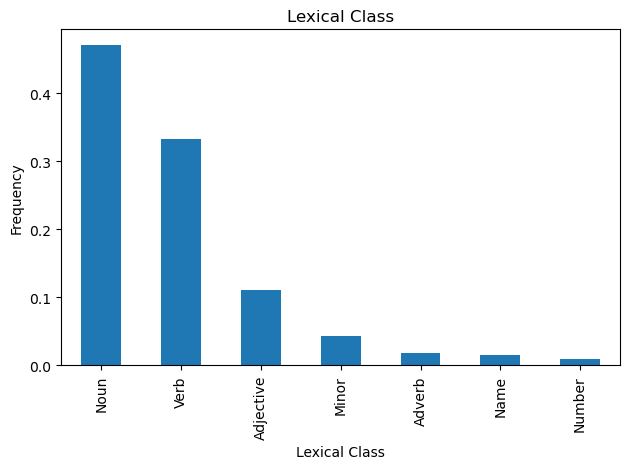

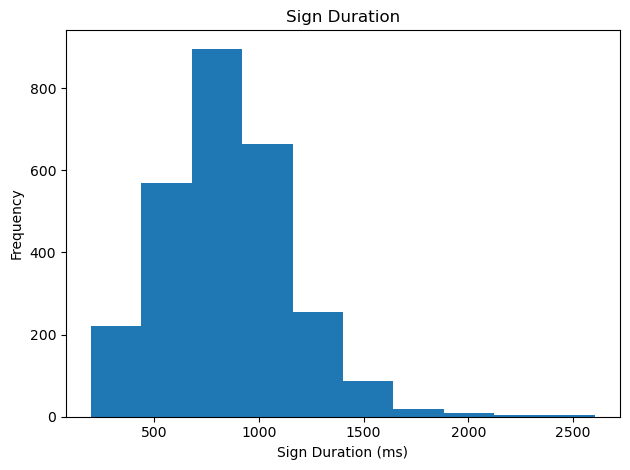

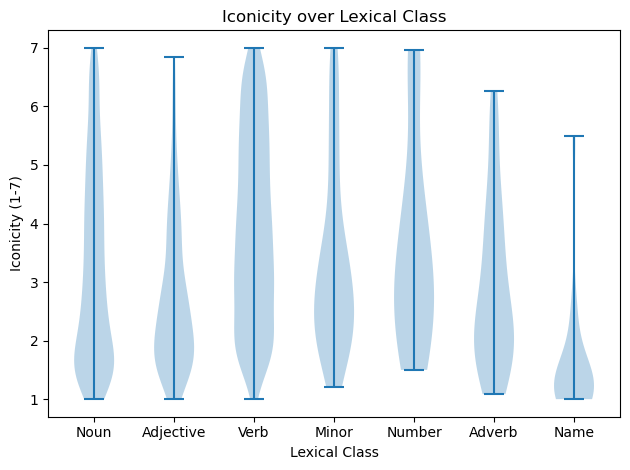

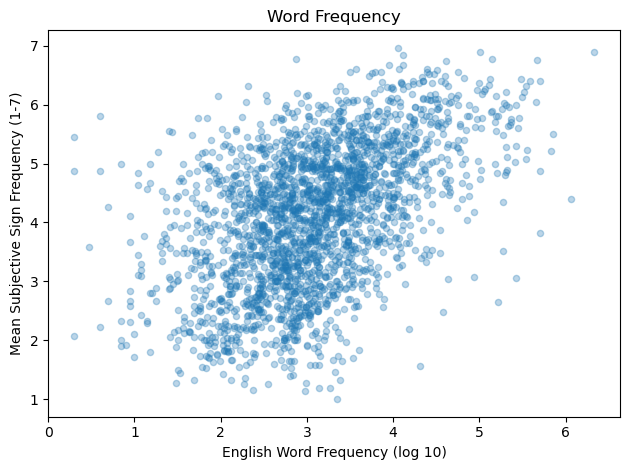

In [5]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) # to make saved figures not cut off

class Graph(Enum):
    SCATTER = 0
    DESCRIBE = 1
    VALUE_CNTS = 2
    BAR = 4
    HISTOGRAM = 5
    VIOLIN = 6
    

def set_labels(title=None, xlabel=None, ylabel=None):
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    

def visualize(x_feature, graph=Graph.VALUE_CNTS, y_feature=None, title=None, xlabel=None, ylabel=None, normalize=True):
    values = df[x_feature]
    match graph:
        case Graph.VALUE_CNTS:
            print(values.value_counts())
        case Graph.DESCRIBE:
            print(values.describe())
        case Graph.BAR:
            values.value_counts(normalize=normalize).plot.bar()
        case Graph.HISTOGRAM:
            values.plot.hist()
        case Graph.SCATTER:
            df.plot.scatter(x_feature, y_feature, alpha=0.3)
        case Graph.VIOLIN:
            categories = [c for c in df[x_feature].unique() if str(c) != 'nan']
            dataset = []
            for category in categories:
                vals = df[df[x_feature] == category][y_feature].values
                dataset.append(vals)

            dataset = []
            for category in categories:
                vals = df[df[x_feature] == category][y_feature].dropna().values
                dataset.append(vals)

            plt.violinplot(dataset = dataset)

            plt.xticks(range(1, len(categories) + 1), categories)
        case _:
            print("Graph type not found")

    set_labels(title, xlabel, ylabel)
    if title:
        plt.savefig(figures_folder + title.replace(' ', ''))
    plt.show()

print('benchmark accuracy:', df['LexicalClass'].value_counts(True))
visualize('LexicalClass', Graph.BAR, title="Lexical Class", xlabel="Lexical Class", ylabel="Frequency")
visualize('SignDuration(ms)', Graph.HISTOGRAM, title="Sign Duration", xlabel="Sign Duration (ms)", ylabel="Frequency")
visualize('LexicalClass', Graph.VIOLIN, y_feature='Iconicity(M)', title="Iconicity over Lexical Class", xlabel="Lexical Class", ylabel="Iconicity (1-7)")
visualize('EnglishWF(lg10)', Graph.SCATTER, y_feature='SignFrequency(M)', title="Word Frequency", xlabel="English Word Frequency (log 10)", ylabel="Mean Subjective Sign Frequency (1-7)")


## Split

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

df_pre = df[features].dropna(subset='LexicalClass')

# let's separate the feature matrix X, and target variable y
y = df_pre['LexicalClass'] # remember, we want to predict who earns more than 50k or less than 50k
X = df_pre.loc[:, df_pre.columns != 'LexicalClass'] # all other columns are features

random_state = 42

# def split(X, y, random_state):
#     """Splits the data into 0.6/0.2/0.2 train/validation/test sets"""
#     # first split to separate out the training set
#     X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state,stratify=y)

#     # second split to separate out the validation and test sets
#     X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state,stratify=y_other)

#     return X_train, X_val, X_test, y_train, y_val, y_test


def split(X, y, random_state):
    """Splits the data into 0.6/0.2/0.2 train/validation/test sets"""
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=random_state, stratify=y)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split(X, y, random_state)


In [7]:

X['FlexionChange.2.0'].value_counts(dropna=False)

0.0    2007
1.0     529
NaN     182
Name: FlexionChange.2.0, dtype: int64

## Preprocessing

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin



onehot_ftrs = [ftr for ftr in feature_types[cat] if ftr != 'LexicalClass']
std_ftrs = feature_types[cont]
bool_ftrs = feature_types[boolean]
boolna_ftrs = feature_types[boolna]
ord_ftrs = feature_types[ord]

categorical_transformer = Pipeline(steps=[
    ('imputer1', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

boolna_transformer = Pipeline(steps=[
    ('imputer3', SimpleImputer(strategy='constant', fill_value=2)),
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='median')),
    ('ordinal', StandardScaler())])

standard_transformer = Pipeline(steps=[
    ('imputer3', SimpleImputer(strategy='mean')),
    ('standard', StandardScaler())
])

# print(onehot_ftrs)
# X = X.astype(str)
# for ftr in onehot_ftrs:
#     print(ftr)
#     print(X[ftr].value_counts())
#     X_train[ftr] = X_train[ftr].astype(str)

    # print(ftr)
# X = pd.DataFrame(X)

preprocessor = ColumnTransformer(
    transformers=[
        ('boolean', StandardScaler(), bool_ftrs),
        ('bool_na', boolna_transformer, boolna_ftrs),
        ('onehot', categorical_transformer, onehot_ftrs),
        ('std', standard_transformer, std_ftrs),
        ('ordinal', ordinal_transformer, ord_ftrs)
    ],
)

prep = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = prep.fit_transform(X_train)
X_val_prep = prep.transform(X_val)
X_test_prep = prep.transform(X_test)


# print(X_train.shape)
# print(X_train_prep.shape)
# print(prep.get_feature_names_out())
# print(X_train_prep)

# print(len(df_pre['SelectedFingers.2.0'].unique()))
# print(onehot_ftrs)

In [9]:
# print(len(clf.get_feature_names_out()))
# clf.get_feature_names_out() - 
xtp = pd.DataFrame(X_train_prep, columns=list(prep.get_feature_names_out()))
# print(xtp)
xtp.isna().sum()
null_cols = xtp.columns[xtp.isna().any()]

# print(xtp)
# print(xtp[''].value_counts())
# print(xtp[null_cols].isna().sum())
# print(X['Iconicity(M)'])
# print(xtp['std__Iconicity(M)'])
# x = list(xtp[xtp.isna()].count())

In [10]:
# pickle the data
# pickle_name = '../data/preprocessed_data'
# with open(pickle_name, 'wb') as f:
#     pickle.dump(X_train, f)

## ML Algo Selection

Try at least four different ML algorithms we covered in class on your dataset and at least two of those models should be non-linear, describe what parameters you tune and the values you try. What metric do you use to evaluate your models’ performance and why? Measure uncertainties due to splitting and due to non-deterministic ML methods (e.g., random forest). In general, explain what considerations went into each step of the pipeline.

Algos:

1. Logistic regression
2. Random Forest Classification
3. XGBoost
4. SVM with rbf


TODO:
- create pipeline with hyperparameter tuning
- measure uncertainty in test scores due to split/etc.

In [83]:
from sklearn.model_selection import GridSearchCV


def train_model(X, y, model, param_grid, n_iters=5):
    models = []
    test_scores = []
    X_tests = []
    y_tests = []
    for random_state in range(n_iters):
        print('training')
        # split and preprocess and train model pipeline
        # TODO: fix split to only do val for XGB
        # X_train, X_val, X_test, y_train, y_val, y_test = split(X, y, random_state)
        X_train, X_test, y_train, y_test = split(X, y, random_state)

        final_scaler = StandardScaler()
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('final scalar', final_scaler),
            ('clf', model)
        ])
        # pipe.fit_transform(X_train, y_train)
        # xvp = pd.DataFrame(pipe.transform(X_val), columns=preprocessor.get_feature_names_out())
        # print(np.sort(xvp.isna().sum()))
        
        grid = GridSearchCV(pipe, param_grid, cv=4, verbose=False, scoring='accuracy', n_jobs=-1)
        # grid = GridSearchCV(pipe, param_grid, cv=4, verbose=2, n_jobs=-1)

        grid.fit(X_train, y_train)
        # grid.fit(X_val, y_val)
        models.append(grid)
        X_tests.append(X_test)
        y_tests.append(y_test)
        test_scores.append(grid.score(X_test, y_test))
        print(grid.best_params_)
        # print('train', grid.score(X_val, y_val))
        # print('test', test_scores[-1])
        
    print('mean/std test score', np.mean(test_scores), np.std(test_scores))
    
    return models, test_scores, X_tests, y_tests


## Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression


lr_pg = {
    'clf__max_iter': [10000],
    'clf__C': np.logspace(-2, 2, 5)
}
lr = LogisticRegression()
lr_models, lr_test_scores, X_tests, y_tests = train_model(X, y, lr, lr_pg)


training
{'clf__C': 0.01, 'clf__max_iter': 10000}
training
{'clf__C': 0.01, 'clf__max_iter': 10000}
training
{'clf__C': 0.01, 'clf__max_iter': 10000}
training
{'clf__C': 0.01, 'clf__max_iter': 10000}
training
{'clf__C': 0.01, 'clf__max_iter': 10000}
mean/std test score 0.6286764705882353 0.013854002706924115


## Random Forest Classification

In [55]:
from sklearn.ensemble import RandomForestClassifier


rf_pg = {
    'clf__random_state': [42],
    'clf__max_features': [3, 7, 10],
    'clf__n_estimators': [500, 800, 1100],
    'clf__max_depth': [4, 7, 10],
}
rf = RandomForestClassifier()
_ = train_model(X, y, rf, rf_pg)

training
{'clf__max_depth': 10, 'clf__max_features': 7, 'clf__n_estimators': 800, 'clf__random_state': 42}
training
{'clf__max_depth': 10, 'clf__max_features': 10, 'clf__n_estimators': 800, 'clf__random_state': 42}
training
{'clf__max_depth': 10, 'clf__max_features': 10, 'clf__n_estimators': 500, 'clf__random_state': 42}
training
{'clf__max_depth': 10, 'clf__max_features': 10, 'clf__n_estimators': 500, 'clf__random_state': 42}
training
{'clf__max_depth': 10, 'clf__max_features': 10, 'clf__n_estimators': 500, 'clf__random_state': 42}
mean/std test score 0.5580882352941177 0.011776189248563948


## K Nearest Neighbors

In [54]:
from sklearn.neighbors import KNeighborsClassifier


knn_pg = {
    'clf__n_neighbors': (1, 5, 10, 12, 15),
    'clf__p': (1, 2),
    'clf__weights': ['distance'],
}
knn = KNeighborsClassifier()
_ = train_model(X, y, knn, knn_pg)

training
{'clf__n_neighbors': 10, 'clf__p': 1, 'clf__weights': 'distance'}
training
{'clf__n_neighbors': 15, 'clf__p': 1, 'clf__weights': 'distance'}
training
{'clf__n_neighbors': 12, 'clf__p': 1, 'clf__weights': 'distance'}
training
{'clf__n_neighbors': 12, 'clf__p': 1, 'clf__weights': 'distance'}
training
{'clf__n_neighbors': 12, 'clf__p': 2, 'clf__weights': 'distance'}
mean/std test score 0.49669117647058825 0.017181355066982245


## SVM with rbf

In [56]:
from sklearn.svm import SVC


svc_pg = {
    'clf__gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
    'clf__C': [1e-1, 1e0, 1e1]
}
svc = SVC()
_ = train_model(X, y, svc, svc_pg)


training
{'clf__C': 1.0, 'clf__gamma': 0.001}
training
{'clf__C': 10.0, 'clf__gamma': 0.001}
training
{'clf__C': 10.0, 'clf__gamma': 0.001}
training
{'clf__C': 1.0, 'clf__gamma': 0.001}
training
{'clf__C': 10.0, 'clf__gamma': 0.001}
mean/std test score 0.5540441176470589 0.025193884851487977


## Scores

### Summary

| Metric              | Baseline | Model |
|---------------------|----------|-------|
| Accuracy            | 0.47     | 0.62  |
| F1 score (micro)    | 0.47     | 0.62  |
| F1 score (macro)    | 0.09     | 0.33  |
| F1 score (weighted) | 0.30     | 0.60  |

### Split and preprocess data for analysis

In [142]:
X_train, X_test, y_train, y_test = split(X, y, 42)
prep = Pipeline([
            ('preprocessor', preprocessor),
            ('final scalar', StandardScaler()), 
])

xtrp = prep.fit_transform(X_train)
xtep = prep.transform(X_test)

### Baseline values

In [135]:
print(y_test.value_counts())
base_pred = np.full(len(y_test), y_test.value_counts().idxmax())
print()
print('most common:', base_pred[0]) # most common is noun

Noun         256
Verb         181
Adjective     60
Minor         24
Adverb        10
Name           8
Number         5
Name: LexicalClass, dtype: int64

most common: Noun


### Model retrained with ideal parameters

In [134]:
best_C = 0.01

model = LogisticRegression(C=best_C, max_iter=1000)
model.fit(xtrp, y_train)
y_pred = model.predict(xtep)

### Metric values

In [141]:
from sklearn.metrics import accuracy_score, fbeta_score

# baseline
base_acc = accuracy_score(y_test, base_pred)
base_f1_micro = fbeta_score(y_test, base_pred, beta=1, average='micro')
base_f1_macro = fbeta_score(y_test, base_pred, beta=1, average='macro')
base_f1_weighted = fbeta_score(y_test, base_pred, beta=1, average='weighted')

# model
acc = accuracy_score(y_test, y_pred)
f1_micro = fbeta_score(y_test, y_pred, beta=1, average='micro')
f1_macro = fbeta_score(y_test, y_pred, beta=1, average='macro')
f1_weighted = fbeta_score(y_test, y_pred, beta=1, average='weighted')

# display
print('baseline accuracy:', base_acc)
print('model accuracy:', acc)
print()
print('baseline f1 micro:', base_f1_micro)
print('model f1 micro:', f1_micro)
print()
print('baseline f1 macro:', base_f1_macro)
print('model f1 macro:', f1_macro)
print()
print('baseline f1 weighted:', base_f1_weighted)
print('model f1 weighted:', f1_weighted)

baseline accuracy: 0.47058823529411764
model accuracy: 0.6231617647058824

baseline f1 micro: 0.47058823529411764
model f1 micro: 0.6231617647058824

baseline f1 macro: 0.09142857142857141
model f1 macro: 0.3260585132054505

baseline f1 weighted: 0.30117647058823527
model f1 weighted: 0.6025719427137252


## Interpretability

### Global Feature Importance (Permutation Feature Importance, Model Coefficients, Global SHAP)

In [178]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


features = prep.get_feature_names_out()
num_ftrs = 10

['onehot__CDISemanticCategory_Action Signs' 'boolean__Initialized.2.0'
 'onehot__CDISemanticCategory_Descriptive Signs'
 'boolean__RepeatedMovement.2.0'
 'onehot__SecondMinorLocation.2.0_TorsoMid'
 'std__Neighborhood Density 2.0'
 'onehot__CDISemanticCategory_Prepositions and Locations'
 'std__Iconicity(N)' 'std__Iconicity(Z)' 'onehot__IconicityType_Arbitrary']


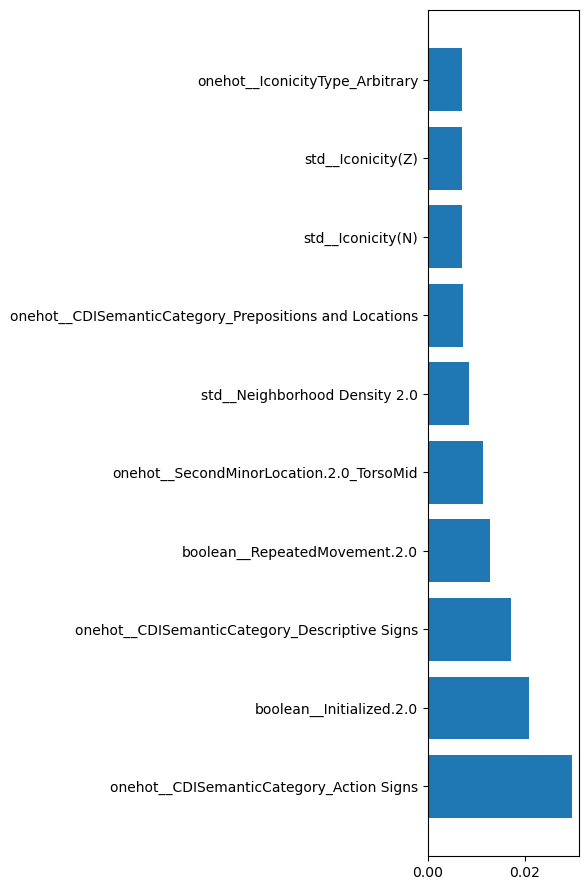

In [182]:
# permutation feature importance
result = permutation_importance(model, xtep, y_test, scoring='accuracy')
mean_pfi = result.importances_mean
top_ftr_indices = np.argsort(mean_pfi)[::-1]
top_ftrs = features[top_ftr_indices][:num_ftrs]
top_importances = mean_pfi[top_ftr_indices][:num_ftrs]
print(top_ftrs)
plt.figure(figsize=(6, 9))
plt.barh(np.arange(num_ftrs), top_importances)
plt.yticks(np.arange(num_ftrs), top_ftrs)
plt.show()


### Linear Model Coefficients

(7, 459) ['Adjective' 'Adverb' 'Minor' 'Name' 'Noun' 'Number' 'Verb']
class: Adjective
['onehot__CDISemanticCategory_Descriptive Signs'
 'onehot__IconicityType_missing' 'std__Iconicity(SD)'
 'onehot__IconicityType_Arbitrary'
 'onehot__SecondMinorLocationM2.2.0_FingerFront'
 'onehot__CDISemanticCategory_Action Signs'
 'onehot__NonDominantHandshape.2.0_Lax'
 'onehot__NonDominantHandshape.2.0_r' 'onehot__MajorLocation.2.0_Head'
 'bool_na__ThumbContact.2.0_1.0']
[ 0.34317845 -0.14870831  0.11504543  0.11130218  0.10315079 -0.10136229
  0.09947906  0.09820353  0.09634256 -0.09445058]
class: Adverb
['onehot__CDISemanticCategory_Signs About Time'
 'onehot__IconicityType_Perceptual' 'onehot__MinorLocation.2.0_HeadTop'
 'onehot__MinorLocation.2.0_BodyAway' 'boolean__RepeatedMovement.2.0'
 'boolean__Initialized.2.0' 'std__SignFrequency(M-Native)'
 'std__SignFreq(Z-native)' 'std__SignFrequency(Z)' 'std__EnglishWF(lg10)']
[ 0.10933422  0.10177425  0.09979527  0.09795049 -0.09249478 -0.08626869
  0

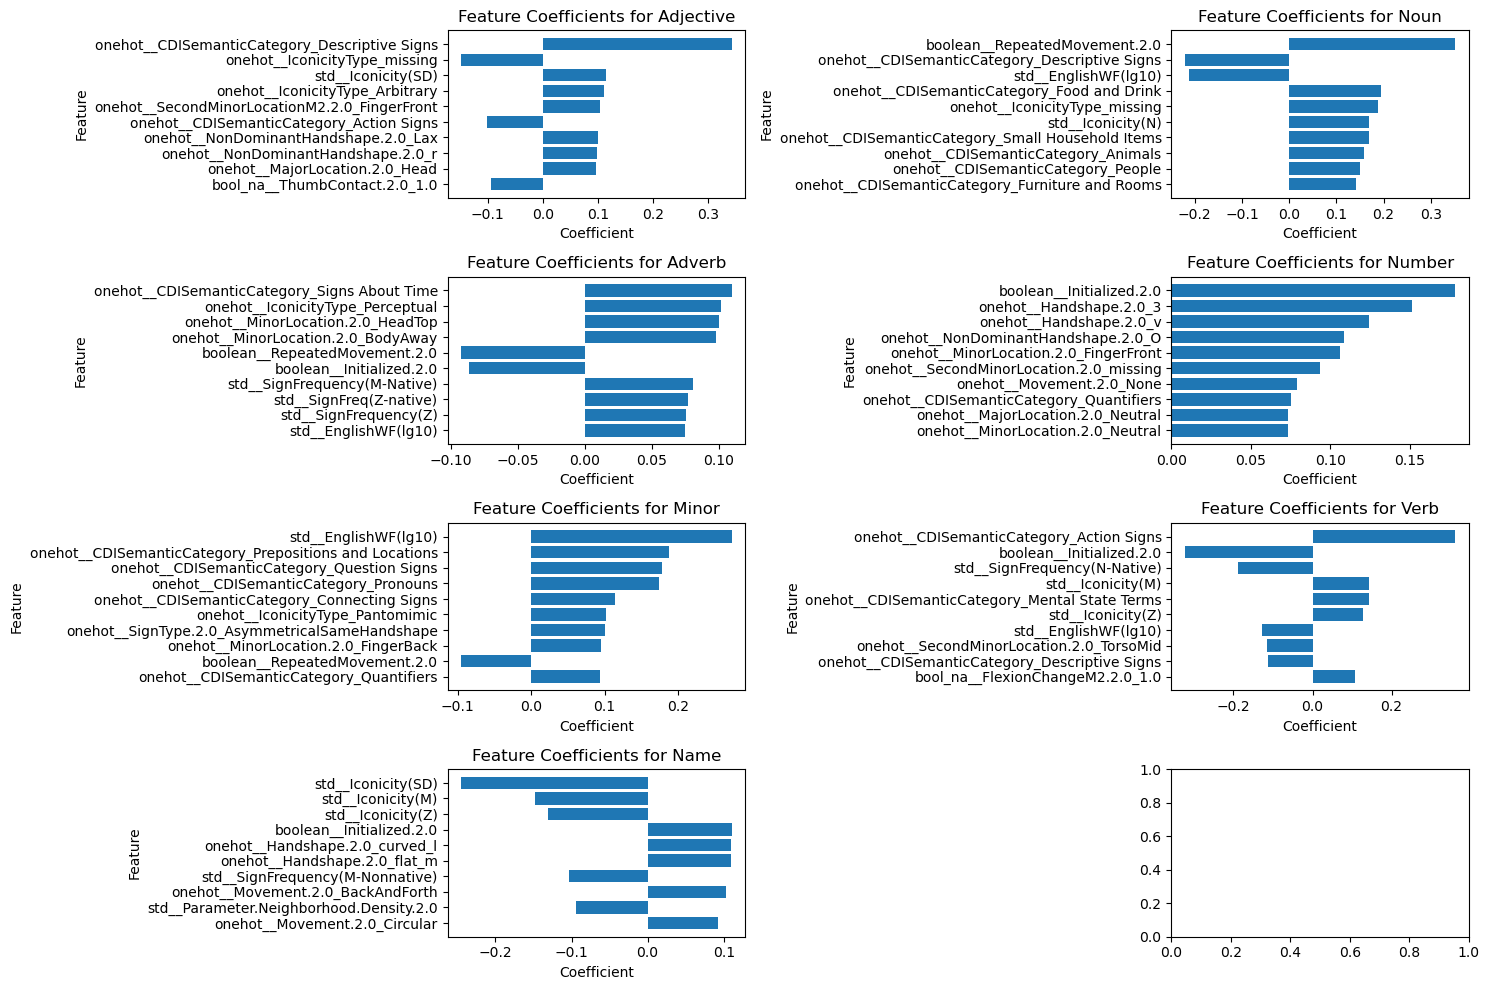

In [195]:
classes = model.classes_
coefs = model.coef_
print(coefs.shape, classes)
fig, axs = plt.subplots(4, 2)
for i, label in enumerate(classes):
    x, y = i % 4, i // 4
    ax = axs[x, y]

    class_coefs = coefs[i, :]

    top_ftr_indices = np.argsort(np.abs(class_coefs))[::-1][:num_ftrs]
    top_ftrs = features[top_ftr_indices]
    top_coefs = class_coefs[top_ftr_indices]
    print('class:', label)
    print(top_ftrs)
    print(top_coefs)
    
    ax.barh(np.arange(num_ftrs), top_coefs[::-1])
    ax.set_yticks(np.arange(num_ftrs), top_ftrs[::-1])
    ax.set_ylabel("Feature")
    ax.set_xlabel("Coefficient")
    ax.set_title(f"Feature Coefficients for {label} class")
    fig.set_size_inches(15, 10)
    fig.show()

### Global SHAP

In [ ]:

# global SHAP

### SHAP

In [113]:
import shap
# create a shape force plot for the model and the data
shap.initjs()
explainer = shap.LinearExplainer(best_model, xtep)
shap_values = explainer.shap_values(xtep)
print(explainer.expected_value, shap_values[0])
i=4
xtep = pd.DataFrame(xtep, columns=prep.get_feature_names_out())
shap.force_plot(explainer.expected_value[0], shap_values[0][i], xtep.values[i], feature_names=xtep.columns)
# shap.force_plot(explainer.expected_value, shap_values[0, :], features=df_test.loc[index, :].round(2), feature_names=XGB.get_booster().feature_names, matplotlib=True, show=False)
# shap.force_plot(explainer.expected_value, shap_values[index, :], features=df_test.loc[index, :].round(2), feature_names=XGB.get_booster().feature_names, matplotlib=True, show=False)

[ 0.72822791 -1.16575864 -0.50288804 -1.61234053  2.57906512 -1.7956824
  1.76937658] [[ 0.01406894  0.0039104   0.00372119 ...  0.01066899  0.00810649
  -0.0238469 ]
 [-0.00210226  0.0039104   0.00372119 ... -0.00108107  0.00810649
  -0.0238469 ]
 [-0.00210226  0.0039104   0.00372119 ...  0.00718167  0.00810649
  -0.00069457]
 ...
 [-0.00210226  0.0039104   0.00372119 ... -0.00481972  0.00810649
  -0.0238469 ]
 [-0.00210226  0.0039104   0.00372119 ... -0.00749019  0.00810649
  -0.0238469 ]
 [-0.00210226  0.0039104   0.00372119 ... -0.00946948  0.00810649
   0.02245776]]
